## Cluster Transformer


<img src="https://i.imgur.com/Fjm01Ca.png">


[ClusterTransformer](https://github.com/abhilash1910/ClusterTransformer) is a topic clustering/modelling library built on top of [Huggingface Transformers](https://huggingface.co) to cluster/model semantically and contextually similar corpus into common clusters. The consequent loss is determined using cosine similarity after passing the corpus extracts through the forward pass of a generic Transformer module. The cosine metric is chosen as the main metric before applying agglomerative clustering strategies, based on similarity of neighborhood contexts. The library uses pytorch as the framework for the forward pass (dense feed forward network) construction of the embedding tensors.

<img src="https://venturebeat.com/wp-content/uploads/2019/09/hugging-face.png?w=1200&strip=all">




## Working Demo


In this case, the Quora question pair similarity dataset is taken as the problem statement and instead of using the straightforward way, the Cluster transformer can be applied on a mixed set of the corpus. Instead of testing similarity based on row entries (i.e, question1 and question2), we will first merge all the questions and then try to create the clusters by passing them through the library. Semi supervised embedding weights created fromt the Transformer models can be used to map to the unsupervised clusters in this process. In a way, this is similar to zero shot classification on numeric labels. Since the classification of the clusters entirely depend on the neighborhood of cosine distance/similarity of an embedding eigen vector with respect to the others , the clusters may change for successive iterations.However the contextul similarity should prevail on a larger scale.

The steps to operate this library is as follows:

- Initialise the class: ClusterTransformer()
- Provide the input list of sentences: In this case, the quora similar questions dataframe
   has been taken for experimental purposes. 
- Declare hyperparameters: 
    - batch_size: Batch size for running model inference
    - max_seq_length: Maximum sequence length for transformer to enable truncation
    - convert_to_numpy: If  enabled will return the embeddings in numpy ,else will keep in torch.Tensor
    - normalize_embeddings:If set to True will enable normalization of embeddings.
    - neighborhood_min_size:This is used for neighborhood_detection method and determines the minimum number of entries in                             each cluster
    - cutoff_threshold:This is used for neighborhood_detection method and determines the cutoff cosine similarity score to                        cluster the embeddings.
    - kmeans_max_iter: Hyperparameter for kmeans_detection method signifying nnumber of iterations for convergence.
    - kmeans_random_state:Hyperparameter for kmeans_detection method signifying random initial state.
    - kmeans_no_cluster:Hyperparameter for kmeans_detection method signifying number of cluster.    
    - model_name:Transformer model name ,any transformer from Huggingface pretrained library
    
-  Call the methods:
    -  ClusterTransfomer.model_inference: For creating the embeddings by running inference through 
       any Transformer library (BERT,Albert,Roberta,Distilbert etc.)Returns a torch.Tensor containing
       the embeddings.
    -  ClusterTransformer.neighborhood_detection: For agglomerative clustering from the embeddings created from the 
        model_inference method.Returns a dictionary.
    -  ClusterTransformer.kmeans_detection:For Kmeans clustering from the embeddings created from the 
        model_inference method.Returns a dictionary.
    - ClusterTransformer.convert_to_df: Converts the dictionary from the neighborhood_detection/kmeans_detection methods in                          a dataframe
    - ClusterTransformer.plot_cluster:Used for simple plotting of the clusters for each text topic.


The above mentioned steps are used in this kernel and the effect of different transformers are shown for comparison purposes.

<img src="https://hips.hearstapps.com/digitalspyuk.cdnds.net/17/47/1511265525-justice-league-poster.jpg?resize=480:*">

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data=pd.read_csv('../input/quora-question-pairs/train.csv.zip')
data.head()

## Merge the data into a unified list

Here we merge the data to provide an input list to the library without any prior context as to which question pair should be evaluated with which question pair. This randomization does not affect the model performance in any case, and is extremely useful to understand which pair shares a similar embedding space.


In [ ]:

merged_set=[]
for i in data.question1.tolist():
    merged_set.append(i)
for i in data.question2.tolist():
    merged_set.append(i)
merged_set[:5]

In [ ]:
#Install the library
!pip install ClusterTransformer==0.1

## Method of working

The code steps provided in the tab below, represent all the steps required to be done for creating the clusters. The 'compute_topics' method has the following steps:

- Instantiate the object of the ClusterTransformer
- Specify the transformer name from [pretrained transformers](https://huggingface.co/transformers/pretrained_models.html)
- Specify the hyperparameters
- Get the embeddings from 'model_inference' method
- For agglomerative neighborhood detection use 'neighborhood_detection' method
- For kmeans detection, use the 'kmeans_detection' method
- For converting the dictionary to a dataframe use the 'convert_to_df' method
- For optional plotting of the clusters w.r.t corpus samples, use the 'plot_cluster' method

A similar demonstration has also been provided in the [Google Colab](https://colab.research.google.com/drive/18HAoATFfuXGAGzPcOhWgZa0a9B6yOpKK?usp=sharing)

In [ ]:
%%time
import ClusterTransformer.ClusterTransformer as cluster_transformer

def compute_topics(transformer_name):
    
    #Instantiate the object
    ct=cluster_transformer.ClusterTransformer()
    #Transformer model for inference
    model_name=transformer_name
    
    #Hyperparameters
    #Hyperparameters for model inference
    batch_size=500
    max_seq_length=64
    convert_to_numpy=False
    normalize_embeddings=False
    
    #Hyperparameters for Agglomerative clustering
    neighborhood_min_size=3
    cutoff_threshold=0.95
    #Hyperparameters for K means clustering
    kmeans_max_iter=100
    kmeans_random_state=42
    kmeans_no_clusters=8
    
    #Sub input data list
    sub_merged_sent=merged_set[:200]
    #Transformer (Longformer) embeddings
    embeddings=ct.model_inference(sub_merged_sent,batch_size,model_name,max_seq_length,normalize_embeddings,convert_to_numpy)
    #Hierarchical agglomerative detection
    output_dict=ct.neighborhood_detection(sub_merged_sent,embeddings,cutoff_threshold,neighborhood_min_size)
    #Kmeans detection
    output_kmeans_dict=ct.kmeans_detection(sub_merged_sent,embeddings,kmeans_no_clusters,kmeans_max_iter,kmeans_random_state)
    #Agglomerative clustering
    neighborhood_detection_df=ct.convert_to_df(output_dict)
    #KMeans clustering 
    kmeans_df=ct.convert_to_df(output_kmeans_dict)
    return neighborhood_detection_df,kmeans_df 
    
    

## Testing with BERT


<img src="https://miro.medium.com/max/1200/0*pA4-59_AWAYcEKqT.png">

## BERT 

[BERT](https://arxiv.org/abs/1810.04805) is [bidirectional encoder Transformer model](https://github.com/google-research/bert)


<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor.png">



The entire workflow can be designed as follows:


This image can be used to describe the workflow:


<img src="http://jalammar.github.io/images/distilBERT/bert-input-to-output-tensor-recap.png">


Slicing the important part
For sentence classification, we’re only only interested in BERT’s output for the [CLS] token, so we select that slice of the cube and discard everything else.


<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png">


BERT Model

<img src="https://miro.medium.com/max/740/1*G6PYuBxc7ryP4Pz7nrZJgQ@2x.png">




In [ ]:
%%time
import matplotlib.pyplot as plt
n_df,k_df=compute_topics('bert-large-uncased')
kg_df=k_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
ng_df=n_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
rng = np.random.RandomState(0)
s=1000*rng.rand(len(kg_df['Text']))
s1=1000*rng.rand(len(ng_df['Text']))
ax1.scatter(kg_df['Cluster'],kg_df['Text'],s=s,c=kg_df['Cluster'],alpha=0.3)
ax1.set_title('Kmeans clustering')
ax1.set_xlabel('No of clusters')
ax1.set_ylabel('No of topics')
ax2.scatter(ng_df['Cluster'],ng_df['Text'],s=s1,c=ng_df['Cluster'],alpha=0.3)
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('No of clusters')
ax2.set_ylabel('No of topics')
plt.show()

In [ ]:
#Dataframe Clustered with Agglomerative method
n_df.head()


In [ ]:
#Dataframe Clustered with Kmeans method
k_df.head()

## Implication of Clustering Graphs

The clustering graphs specify which cluster a particular topic belong to and also the count of topics present in a cluster.
For this there are some different outputs:

- For the Kmeans clustering , it tries to produce all the input corpus extracts in the graph.
- For the Agglomerative clustering, the number of clusters produced depends on the 'neighborhood_min_size'. If a default size of 1 is provided then the graph will try to accommodate all the topics in the graph. However if a value of greater than 1 is provided (e.g. 10), then only those clusters which have a size/count of 10 items inside it will be chosen and ranked accordingly in the graph. The graph in this case is strictly non increasing.In the above example,a min size of 3 items per cluster with a similarity score of 0.95 produces 2 clusters (denoted by the purple- label 0 containing 5 items and yellow - label 1 containing 3 items)

## DistilBERT Model


The distilbert performs better than Bert in most cases owing to continuous feedback of attention weights from the teacher to the student network. Where the weights change by a large extent in case of Bert, this fails to happen in DistilBert.


<img src="https://storage.googleapis.com/groundai-web-prod/media%2Fusers%2Fuser_14%2Fproject_391208%2Fimages%2FKD_figures%2Ftransformer_distillation.png">


DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark. 2 significant benchmarks aspects of this Model:

- Quantization :This leads to approximation of internal weight vectors to a numerically smaller precision
- Weights Pruning: Removing some connections from the network.

Knowledge distillation (sometimes also referred to as teacher-student learning) is a compression technique in which a small model is trained to reproduce the behavior of a larger model (or an ensemble of models). It was introduced by Bucila et al. and generalized by Hinton et al. a few years later. We will follow the latter method.Rather than training with a cross-entropy over the hard targets (one-hot encoding of the gold class), we transfer the knowledge from the teacher to the student with a cross-entropy over the soft targets (probabilities of the teacher). Our training loss thus becomes:

<img src="https://miro.medium.com/max/311/1*GZkQPjKC_Wqx1F4Uu3FdiQ.png">

This loss is a richer training signal since a single example enforces much more constraint than a single hard target.
To further expose the mass of the distribution over the classes, Hinton et al. introduce a softmax-temperature:

<img src="https://miro.medium.com/max/291/1*BaVyKMXRWaudFvcI9So8MQ.png">

When T → 0, the distribution becomes a Kronecker (and is equivalent to the one-hot target vector), when T →+∞, it becomes a uniform distribution. The same temperature parameter is applied both to the student and the teacher at training time, further revealing more signals for each training example. At inference, T is set to 1 and recover the standard Softmax.


Some resources:

- [Blog](https://medium.com/huggingface/distilbert-8cf3380435b5)
- [Huggingface](https://huggingface.co/transformers/model_doc/distilbert.html)
- [Paper](https://arxiv.org/abs/1910.01108)

In [ ]:
%%time
import matplotlib.pyplot as plt
n_df,k_df=compute_topics('distilbert-base-uncased')
kg_df=k_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
ng_df=n_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
rng = np.random.RandomState(0)
s=1000*rng.rand(len(kg_df['Text']))
s1=1000*rng.rand(len(ng_df['Text']))
ax1.scatter(kg_df['Cluster'],kg_df['Text'],s=s,c=kg_df['Cluster'],alpha=0.3)
ax1.set_title('Kmeans clustering')
ax1.set_xlabel('No of clusters')
ax1.set_ylabel('No of topics')
ax2.scatter(ng_df['Cluster'],ng_df['Text'],s=s1,c=ng_df['Cluster'],alpha=0.3)
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('No of clusters')
ax2.set_ylabel('No of topics')
plt.show()

In [ ]:
#Dataframe Clustered with Agglomerative method
n_df.head()


In [ ]:
#Dataframe Clustered with Kmeans method
k_df.head()

## XLM Roberta/Roberta


[XLM](https://arxiv.org/pdf/1907.11692.pdf) builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates.

<img src="https://camo.githubusercontent.com/f5c0d05eb0635cdd0e17e137265af23fa825b1d4/68747470733a2f2f646c2e666261697075626c696366696c65732e636f6d2f584c4d2f786c6d5f6669677572652e6a7067">Tips:


This implementation is the same as BertModel with a tiny embeddings tweak as well as a setup for Roberta pretrained models.

RoBERTa has the same architecture as BERT, but uses a byte-level BPE as a tokenizer (same as GPT-2) and uses a different pretraining scheme.

RoBERTa doesn’t have token_type_ids, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token tokenizer.sep_token (or </s>)

CamemBERT is a wrapper around RoBERTa.


Resources:

- [FAIR](https://ai.facebook.com/blog/roberta-an-optimized-method-for-pretraining-self-supervised-nlp-systems/)
- [Pytorch](https://pytorch.org/hub/pytorch_fairseq_roberta/)
- [Github](https://github.com/pytorch/fairseq/tree/master/examples/roberta)
- [Huggingface](https://huggingface.co/transformers/model_doc/roberta.html)

In [ ]:
%%time
import matplotlib.pyplot as plt
n_df,k_df=compute_topics('roberta-large')
kg_df=k_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
ng_df=n_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
rng = np.random.RandomState(0)
s=1000*rng.rand(len(kg_df['Text']))
s1=1000*rng.rand(len(ng_df['Text']))
ax1.scatter(kg_df['Cluster'],kg_df['Text'],s=s,c=kg_df['Cluster'],alpha=0.3)
ax1.set_title('Kmeans clustering')
ax1.set_xlabel('No of clusters')
ax1.set_ylabel('No of topics')
ax2.scatter(ng_df['Cluster'],ng_df['Text'],s=s1,c=ng_df['Cluster'],alpha=0.3)
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('No of clusters')
ax2.set_ylabel('No of topics')
plt.show()

In [ ]:
#Dataframe Clustered with Agglomerative method
n_df.head()


In [ ]:
#Dataframe Clustered with Kmeans method
k_df.head()

## Albert Transformer



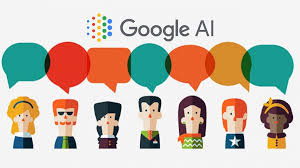


[Albert](https://arxiv.org/abs/1909.11942) is a lightweight bert which introduces parameter sharing, caching, and intermediate repeated splitting of the embedding matrix for efficient modelling tasks.

According to the paper:


'The first one is a factorized embedding parameterization. By decomposing
the large vocabulary embedding matrix into two small matrices, we separate the size of the hidden
layers from the size of vocabulary embedding. This separation makes it easier to grow the hidden
size without significantly increasing the parameter size of the vocabulary embeddings. The second
technique is cross-layer parameter sharing. This technique prevents the parameter from growing
with the depth of the network. Both techniques significantly reduce the number of parameters for
BERT without seriously hurting performance, thus improving parameter-efficiency. An ALBERT
configuration similar to BERT-large has 18x fewer parameters and can be trained about 1.7x faster.
The parameter reduction techniques also act as a form of regularization that stabilizes the training
and helps with generalization.
To further improve the performance of ALBERT, we also introduce a self-supervised loss for
sentence-order prediction (SOP). SOP primary focuses on inter-sentence coherence and is designed
to address the ineffectiveness (Yang et al., 2019; Liu et al., 2019) of the next sentence prediction
(NSP) loss proposed in the original BERT.'


Resources:

- [Github](https://github.com/google-research/albert)
- [Huggingface](https://huggingface.co/transformers/model_doc/albert.html)


In [ ]:
%%time
import matplotlib.pyplot as plt
n_df,k_df=compute_topics('albert-base-v1')
kg_df=k_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
ng_df=n_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
rng = np.random.RandomState(0)
s=1000*rng.rand(len(kg_df['Text']))
s1=1000*rng.rand(len(ng_df['Text']))
ax1.scatter(kg_df['Cluster'],kg_df['Text'],s=s,c=kg_df['Cluster'],alpha=0.3)
ax1.set_title('Kmeans clustering')
ax1.set_xlabel('No of clusters')
ax1.set_ylabel('No of topics')
ax2.scatter(ng_df['Cluster'],ng_df['Text'],s=s1,c=ng_df['Cluster'],alpha=0.3)
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('No of clusters')
ax2.set_ylabel('No of topics')
plt.show()

In [ ]:
#Dataframe Clustered with Agglomerative method
n_df.head()


In [ ]:
#Dataframe Clustered with Kmeans method
k_df.head()

## BART Model

[This](https://arxiv.org/abs/1910.13461) is alternate SOTA model to denoise sentence2 sentence pretraining for natural language generation,comprehension etc. The most important points can be summarized as:


- Bart uses a standard seq2seq/machine translation architecture with a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT).

- The pretraining task involves randomly shuffling the order of the original sentences and a novel in-filling scheme, where spans of text are replaced with a single mask token.

- BART is particularly effective when fine tuned for text generation but also works well for comprehension tasks. It matches the performance of RoBERTa with comparable training resources on GLUE and SQuAD, achieves new state-of-the-art results on a range of abstractive dialogue, question answering, and summarization tasks, with gains of up to 6 ROUGE.

The architecture contains these encoder -decoder modules :
<img src="https://miro.medium.com/max/3138/1*Qss9gtS1nw_sgcG1pMAM2A.png">

<img src="https://miseciara.files.wordpress.com/2013/11/bart.gif">


Some resources:
- [Blog](https://medium.com/dair-ai/bart-are-all-pretraining-techniques-created-equal-e869a490042e)
- [Blog-BART](https://medium.com/analytics-vidhya/revealing-bart-a-denoising-objective-for-pretraining-c6e8f8009564)

In [ ]:
%%time
import matplotlib.pyplot as plt
n_df,k_df=compute_topics('facebook/bart-large')
kg_df=k_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
ng_df=n_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
rng = np.random.RandomState(0)
s=1000*rng.rand(len(kg_df['Text']))
s1=1000*rng.rand(len(ng_df['Text']))
ax1.scatter(kg_df['Cluster'],kg_df['Text'],s=s,c=kg_df['Cluster'],alpha=0.3)
ax1.set_title('Kmeans clustering')
ax1.set_xlabel('No of clusters')
ax1.set_ylabel('No of topics')
ax2.scatter(ng_df['Cluster'],ng_df['Text'],s=s1,c=ng_df['Cluster'],alpha=0.3)
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('No of clusters')
ax2.set_ylabel('No of topics')
plt.show()

In [ ]:
#Dataframe Clustered with Agglomerative method
n_df.head()


In [ ]:
#Dataframe Clustered with Kmeans method
k_df.head()

## Longformer


The Longformer model was presented in Longformer: [The Long-Document Transformer](https://arxiv.org/pdf/2004.05150.pdf) by Iz Beltagy, Matthew E. Peters, Arman Cohan.

The abstract from the paper is the following:

Transformer-based models are unable to process long sequences due to their self-attention operation, which scales quadratically with the sequence length. To address this limitation, we introduce the Longformer with an attention mechanism that scales linearly with sequence length, making it easy to process documents of thousands of tokens or longer. Longformer’s attention mechanism is a drop-in replacement for the standard self-attention and combines a local windowed attention with a task motivated global attention. Following prior work on long-sequence transformers, we evaluate Longformer on character-level language modeling and achieve state-of-the-art results on text8 and enwik8. In contrast to most prior work, we also pretrain Longformer and finetune it on a variety of downstream tasks. Our pretrained Longformer consistently outperforms RoBERTa on long document tasks and sets new state-of-the-art results on WikiHop and TriviaQA.

Tips:

Since the Longformer is based on RoBERTa, it doesn’t have token_type_ids. You don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token tokenizer.sep_token (or </s>).

- [Repository](https://github.com/allenai/longformer)


<img src="https://t-dab.com/wp-content/uploads/2020/11/alex-300x269.png">

In [ ]:
%%time
import matplotlib.pyplot as plt
n_df,k_df=compute_topics('allenai/longformer-base-4096')
kg_df=k_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
ng_df=n_df.groupby('Cluster').agg({'Text':'count'}).reset_index()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
rng = np.random.RandomState(0)
s=1000*rng.rand(len(kg_df['Text']))
s1=1000*rng.rand(len(ng_df['Text']))
ax1.scatter(kg_df['Cluster'],kg_df['Text'],s=s,c=kg_df['Cluster'],alpha=0.3)
ax1.set_title('Kmeans clustering')
ax1.set_xlabel('No of clusters')
ax1.set_ylabel('No of topics')
ax2.scatter(ng_df['Cluster'],ng_df['Text'],s=s1,c=ng_df['Cluster'],alpha=0.3)
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('No of clusters')
ax2.set_ylabel('No of topics')
plt.show()

In [ ]:
#Dataframe Clustered with Agglomerative method
n_df.head()


In [ ]:
#Dataframe Clustered with Kmeans method
k_df.head()

## Using with other Transformers

This library can be used with other variants of Transformers, present in this [link](https://huggingface.co/transformers/pretrained_models.html). Encoder Decoder models like T5 and Pegasus are not supported yet, and performance of Generative models like GPT can be tested as well.

Library details:

- [Github](https://github.com/abhilash1910/ClusterTransformer)
- [Pypi](https://pypi.org/project/ClusterTransformer/)

<img src="https://redefined.s3.us-east-2.amazonaws.com/wp-content/uploads/2020/05/20151235/justiceleague_wbmoviestillsdb.jpg">